In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [38]:
tf.__version__

'2.1.0'

In [39]:
keras.__version__

'2.2.4-tf'

In [40]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [41]:
X_train_full.dtype

dtype('uint8')

In [42]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0#勾配降下法をしようするので，ピクセル強度を0~1にスケーリングするために255で割ってる
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])
print(X_train.shape)
print(X_valid.shape)

Coat
(55000, 28, 28)
(5000, 28, 28)


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
"""
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])
他の書き方もある
例えば
from keras.layers import Dense
output_layer = Dense(10)
他にも，
from tensorflow.keras.layers import Dense
output_layer = Dense(10)
今回は
from tensorflow import keras
output_layer = keras.layers.Dense(10)
"""

'model = keras.models.Sequential([\nkeras.layers.Flatten(input_shape=[28, 28]),\nkeras.layers.Dense(300, activation="relu"),\nkeras.layers.Dense(100, activation="relu"),\nkeras.layers.Dense(10, activation="softmax")\n])'

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [13]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.0495859 , -0.07111804,  0.03528389, ...,  0.03271744,
        -0.01788602,  0.01490139],
       [ 0.02928781,  0.00810733, -0.04003863, ...,  0.04839905,
         0.04544053, -0.04511417],
       [ 0.06520361,  0.00657848, -0.06878223, ..., -0.04921008,
        -0.00530365, -0.03277544],
       ...,
       [-0.06912534,  0.03263504,  0.04334605, ...,  0.06775445,
        -0.03774218,  0.05520639],
       [-0.04184606, -0.01013576,  0.06800807, ..., -0.03174031,
        -0.02611629,  0.00527066],
       [ 0.05853894, -0.02808079, -0.04202105, ...,  0.05236192,
         0.04270537, -0.01536341]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

- 入力形状が分かってる場合には,input_shapeで指定ｓた方が良い．しなくても問題はないが.

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#一般的には，optimizer=keras.optimizer.SGD(lr=)を設定しよう．defaults=0.01

- one-hot表現の場合はクロスエントロピー誤差を誤差計算に使用しよう
- 二値分類の場合はsigmoid関数を使用しよう
- sgd(確率的勾配降下法)では，誤差逆伝播が行われている．

In [31]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.2271 - accuracy: 0.9177 - val_loss: 0.3266 - val_accuracy: 0.8828
Epoch 2/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.2239 - accuracy: 0.9187 - val_loss: 0.3073 - val_accuracy: 0.8900
Epoch 3/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.2201 - accuracy: 0.9208 - val_loss: 0.2963 - val_accuracy: 0.8932
Epoch 4/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.2175 - accuracy: 0.9219 - val_loss: 0.3051 - val_accuracy: 0.8894
Epoch 5/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.2141 - accuracy: 0.9237 - val_loss: 0.2999 - val_accuracy: 0.8924
Epoch 6/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.2109 - accuracy: 0.9247 - val_loss: 0.2993 - val_accuracy: 0.8910
Epoch 7/30
55000/55000 [===========================

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

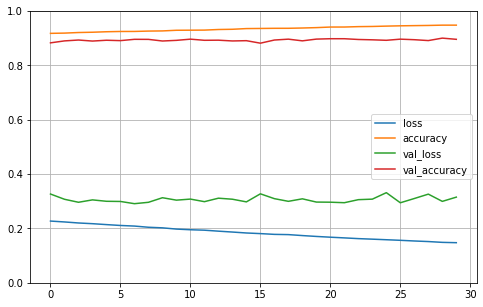

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
#plt.ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 94.1314 - accuracy: 0.8311


[94.13136625366211, 0.8311]

In [46]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_pred=model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [49]:
y_test[:3]

array([9, 2, 1], dtype=uint8)